In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

In [5]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==1.5.2
numpy==1.23.5
seaborn==0.12.1


In [59]:
df=pd.read_csv("application_data.csv")
df.shape

(307511, 122)

In [4]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,SK_ID_CURR[int64],Mean (sd) : 278180.5 (102790.2)min < med < max:100002.0 < 278202.0 < 456255.0IQR (CV) : 177997.0 (2.7),"307,511 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACK0lEQVR4nO3Yu47aUBRG4X0Mgw4X2eIS6GhSRkphiYYHSJmHzSsgUaSmSJOKDsmyjHAGYRGnmSbNDL4MzC+tr2ZztsU6SODKsjTgowsevQBwi+6jF0C7nHN9M+vVHL+UZfnc5j5teTPUhg8emNnfmrNN51XPbjLrJ5PJtyiKhnWGj8dj6pz7UTfW97wkr4bqnOtPp9PvYRiOq556vV6f8jz/PBqNfgdBUNxzXvXspnsXReHN7Mtqtfo5m82OVWazLPObzWaeJMnMOVdp9sW7XpK3vlF7YRiO1+v1cxRF5yoH7/f78W63+xTH8a/FYpFWmW06r3p2S3sPvPfFfD7/U2U2z/Onoii+LpfLTqfTqfRZmzW/JNvtdpwkSc/MaoVqZmZRFJ2rPniapn0zs+FwWHm26bzq2W3tXcflcul67wdxHJ/vfUlevLo7P6bwn0dcklvw9xQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokdG95UZZlvuobn04nb2aW57k/HA6De86rnq26d9P5W/r6ByCxP3C55mxvAAAAAElFTkSuQmCC"">",0(0.0%)
2,TARGET[int64],Mean (sd) : 0.1 (0.3)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtUlEQVR4nO3XTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL15s9JyzAX/dx7sPANyjuvWCu7dmVhfuP+Wc18JZ4MvVUN297ft+F0LoSpYvy3Jw9z2x4lm3vqh1CKEbx3GNMW6PLE4pNdM0dfM812ZGqHjKzavfzCzGuA3DcCzY3xbMAN/wMwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJ1bsPgP/D3VszqwvHTznn9aeHhIqXcPe27/tdCKErmV+W5eDu+59iJVS8Sh1C6MZxXGOM2yODKaVmmqZunufazAgVvy/GuA3DcCwYba895GcKEggVEu66+lNKzaOLU0rN+XyuzCy4+8MHg5xwuVyq0lZuvfMJdyVOfRsPMKsAAAAASUVORK5CYII="">",0(0.0%)
3,NAME_CONTRACT_TYPE[object],1. Cash loans2. Revolving loans,"278,232 (90.5%)29,279 (9.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWrDMBRF0a9iQjKRMAYvxovIYrsI7cYYa9CETNRB5yGW3JfWumdu+IOLIcHP5ZwNUHBmdjGz07sPwb/xyDnfSh7shmG4eu/7vS/CMaWUFufcZ0lwnfe+n6bpFkK4/8ZxOI51Xc8xxn6e55OZbY/NzCyEcB/H8Wv363BEl9IHP/a8AniG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmc7s56O4dx+Cv6+2ky6ltMQYe6v4KA7tSCktZvYoeZbBC7YqHrw4pnxQqX2zFVeO9lRN+WpmXWhP8ZSvdtaF9tRO+fgFi5fxpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCme8jH/w1ZVU76aWRfaw+AFMt8KW2rfOfaTaQAAAABJRU5ErkJggg=="">",0(0.0%)
4,CODE_GENDER[object],1. F2. M3. XNA,"202,448 (65.8%)105,059 (34.2%)4 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3bQW6CUBSF4fMIsXUCISQsod0Di+hiuwgW0T0QwhtU64QOHBjTKT3P3v7fCq7xjwbjSdu2CXCoSh+A/yNJOko6lD4EP1y2bTuVPmJPdd/3b03TdKUPwb2c85JSeo8UXN00TTeO46lt23PpY3C1ruvzNE3dPM8HSXFik6S2bc/DMHyWPgZ3jqUP2BsPCLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDTS1d/z9V+hDcRH0/6pzzMk1Tp4D/n/rLcs6LpEvpO/bEBuFxhdsgJKZ8cIn6yRbuUyGCkOuqiMukCMKtq6IukyKIuq7iyfoB8aMubIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GATbl0V6bVEE3JdFXGZFAEbBNiwroINDwiwITbYVCml15QST3D4dZWkF0lPpQ9BfHyNwobYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoNNJelD0lfpQxAf6yrY8DUKm2/nRXM6yWPU4wAAAABJRU5ErkJggg=="">",0(0.0%)
5,FLAG_OWN_CAR[object],1. N2. Y,"202,924 (66.0%)104,587 (34.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6B

In [60]:
# drop columns with over 50% missing and the ID column
drop_col = ['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
            'COMMONAREA_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
            'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 
            'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE','ELEVATORS_MODE', 
            'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE','LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
            'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI','BASEMENTAREA_MEDI', 
            'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI','COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
            'FLOORSMAX_MEDI','FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI', 
            'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
            'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','SK_ID_CURR']

df.drop(columns=drop_col,inplace=True)
df.shape

(307511, 72)

'NAME_CONTRACT_TYPE': cat, onehot
'CODE_GENDER': cat, onehot
'FLAG_OWN_CAR': cat, onehot
'FLAG_OWN_REALTY': cat, onehot
'CNT_CHILDREN': num
'AMT_INCOME_TOTAL': num, log transform
'AMT_CREDIT': num, log transform
'AMT_ANNUITY': num, log transform, impute from AMT_CREDIT, add missing indicator
'AMT_GOODS_PRICE': num, log transform, impute from AMT_CREDIT, add missing indicator
'NAME_TYPE_SUITE': cat, fillna with "Missing", onehot
'NAME_INCOME_TYPE': cat, onehot
'NAME_EDUCATION_TYPE': cat, onehot
'NAME_FAMILY_STATUS': cat, onehot
'NAME_HOUSING_TYPE':cat, onehot
'REGION_POPULATION_RELATIVE': num
'DAYS_BIRTH': num
'DAYS_EMPLOYED': num, replace error number (365243) with 0
'DAYS_REGISTRATION': num
'DAYS_ID_PUBLISH': num
'FLAG_MOBIL': cat
'FLAG_EMP_PHONE': cat
'FLAG_WORK_PHONE': cat
'FLAG_CONT_MOBILE': cat
'FLAG_PHONE': cat
'FLAG_EMAIL': cat
'OCCUPATION_TYPE': cat, fillna with 'Others', onehot
'CNT_FAM_MEMBERS': num, impute from CNT_CHILDREN+1
'REGION_RATING_CLIENT': num
'REGION_RATING_CLIENT_W_CITY': num
'WEEKDAY_APPR_PROCESS_START': cat, onehot
'HOUR_APPR_PROCESS_START'; cat, onehot
'REG_REGION_NOT_LIVE_REGION': cat
'REG_REGION_NOT_WORK_REGION': cat
'LIVE_REGION_NOT_WORK_REGION': cat
'REG_CITY_NOT_LIVE_CITY': cat
'REG_CITY_NOT_WORK_CITY': cat
'LIVE_CITY_NOT_WORK_CITY': cat
'ORGANIZATION_TYPE': cat, combine less frequent, onehot
'EXT_SOURCE_2': num, impute with mean/median/-1, add missing indicator
'EXT_SOURCE_3': num, impute with mean/median/-1, add missing indicator
'OBS_30_CNT_SOCIAL_CIRCLE': num, impute with mean/median/-1, add missing indicator
'DEF_30_CNT_SOCIAL_CIRCLE': num, impute with mean/median/-1, add missing indicator
'OBS_60_CNT_SOCIAL_CIRCLE': num, impute with mean/median/-1, add missing indicator
'DEF_60_CNT_SOCIAL_CIRCLE': num, impute with mean/median/-1, add missing indicator
'DAYS_LAST_PHONE_CHANGE': num, fillna with 1
'FLAG_DOCUMENT': cat
'AMT_REQ_CREDIT_BUREAU_HOUR': num, impute with mean/median/-1, add missing indicator
'AMT_REQ_CREDIT_BUREAU_DAY': num, impute with mean/median/-1, add missing indicator
'AMT_REQ_CREDIT_BUREAU_WEEK': num, impute with mean/median/-1, add missing indicator
'AMT_REQ_CREDIT_BUREAU_MON': num, impute with mean/median/-1, add missing indicator
'AMT_REQ_CREDIT_BUREAU_QRT': num, impute with mean/median/-1, add missing indicator
'AMT_REQ_CREDIT_BUREAU_YEAR': num, impute with mean/median/-1, add missing indicator

### BINARY COLUMNS

In [6]:
binary_features = ['REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 
                'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [27]:
n_height = len(binary_features) # number of images vertically
n_width = 2 # number of images horizontally
figure_size = (40,200) # figure size
fig, ax = plt.subplots(n_height, n_width, figsize=figure_size)
for i in range(n_height):
    col = binary_features[i]
    sns.countplot(data=df, x=col, hue = "TARGET", ax = ax[i,0])
    pct = (df.groupby([col,'TARGET']).size() / df.groupby(['TARGET']).size()).reset_index().rename({0:'percent'}, axis=1)
    sns.barplot(x=col, hue='TARGET', y='percent', data=pct, ax=ax[i,1])
    sns.set(font_scale = 2)

Notable observations: <br>
1. Many applicants didn't provide DOCUMENT_3.<br>
2. Percentages of applicants who didn't provide DOCUMENT_3 are higher in the fraud group.<br>
3. There are three addresses: permanent, contact and work. When the permanent address or contact address doesn't match work address, the applicant is more likely to be in the fraud group.

### CATEGORICAL COLUMNS

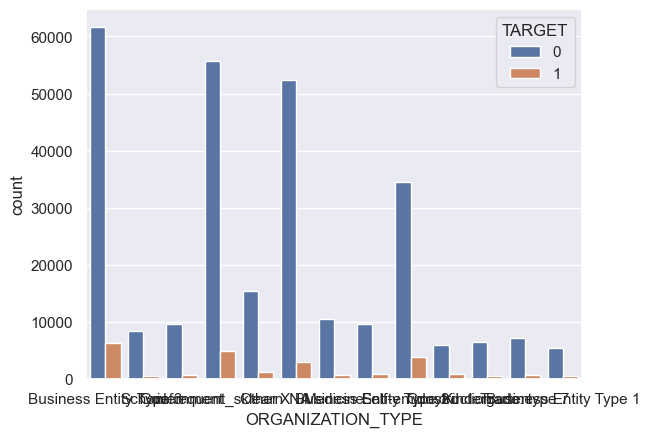

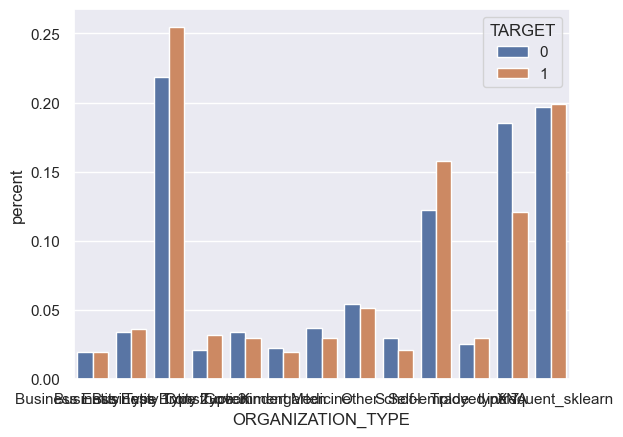

In [103]:
# combine less frequent categories of ORGANIZATION_TYPE
# this is only for EDA, don't change on the original data
enc = OneHotEncoder(max_categories=13,sparse_output=False)
org_type_oh = enc.fit_transform(df[['ORGANIZATION_TYPE']])
org_type = enc.inverse_transform(org_type_oh)

temp_df = pd.DataFrame({'ORGANIZATION_TYPE':org_type.reshape(-1,),'TARGET':df['TARGET']})
sns.countplot(data=temp_df, x='ORGANIZATION_TYPE', hue = "TARGET")
plt.show()
pct = (temp_df.groupby(['ORGANIZATION_TYPE','TARGET']).size() / temp_df.groupby(['TARGET']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='ORGANIZATION_TYPE', hue='TARGET', y='percent', data=pct)
sns.set(font_scale = 0.5)
plt.show()

In [99]:
temp_df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
infrequent_sklearn        60591
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Name: count, dtype: int64

Notable observation:<br>
1. Business Entity Type 3, XNA, Self-employed have different distributions between the normal and fraud groups

### NUMERICAL COLUMNS

In [32]:
num_features = ['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                'AMT_REQ_CREDIT_BUREAU_YEAR']

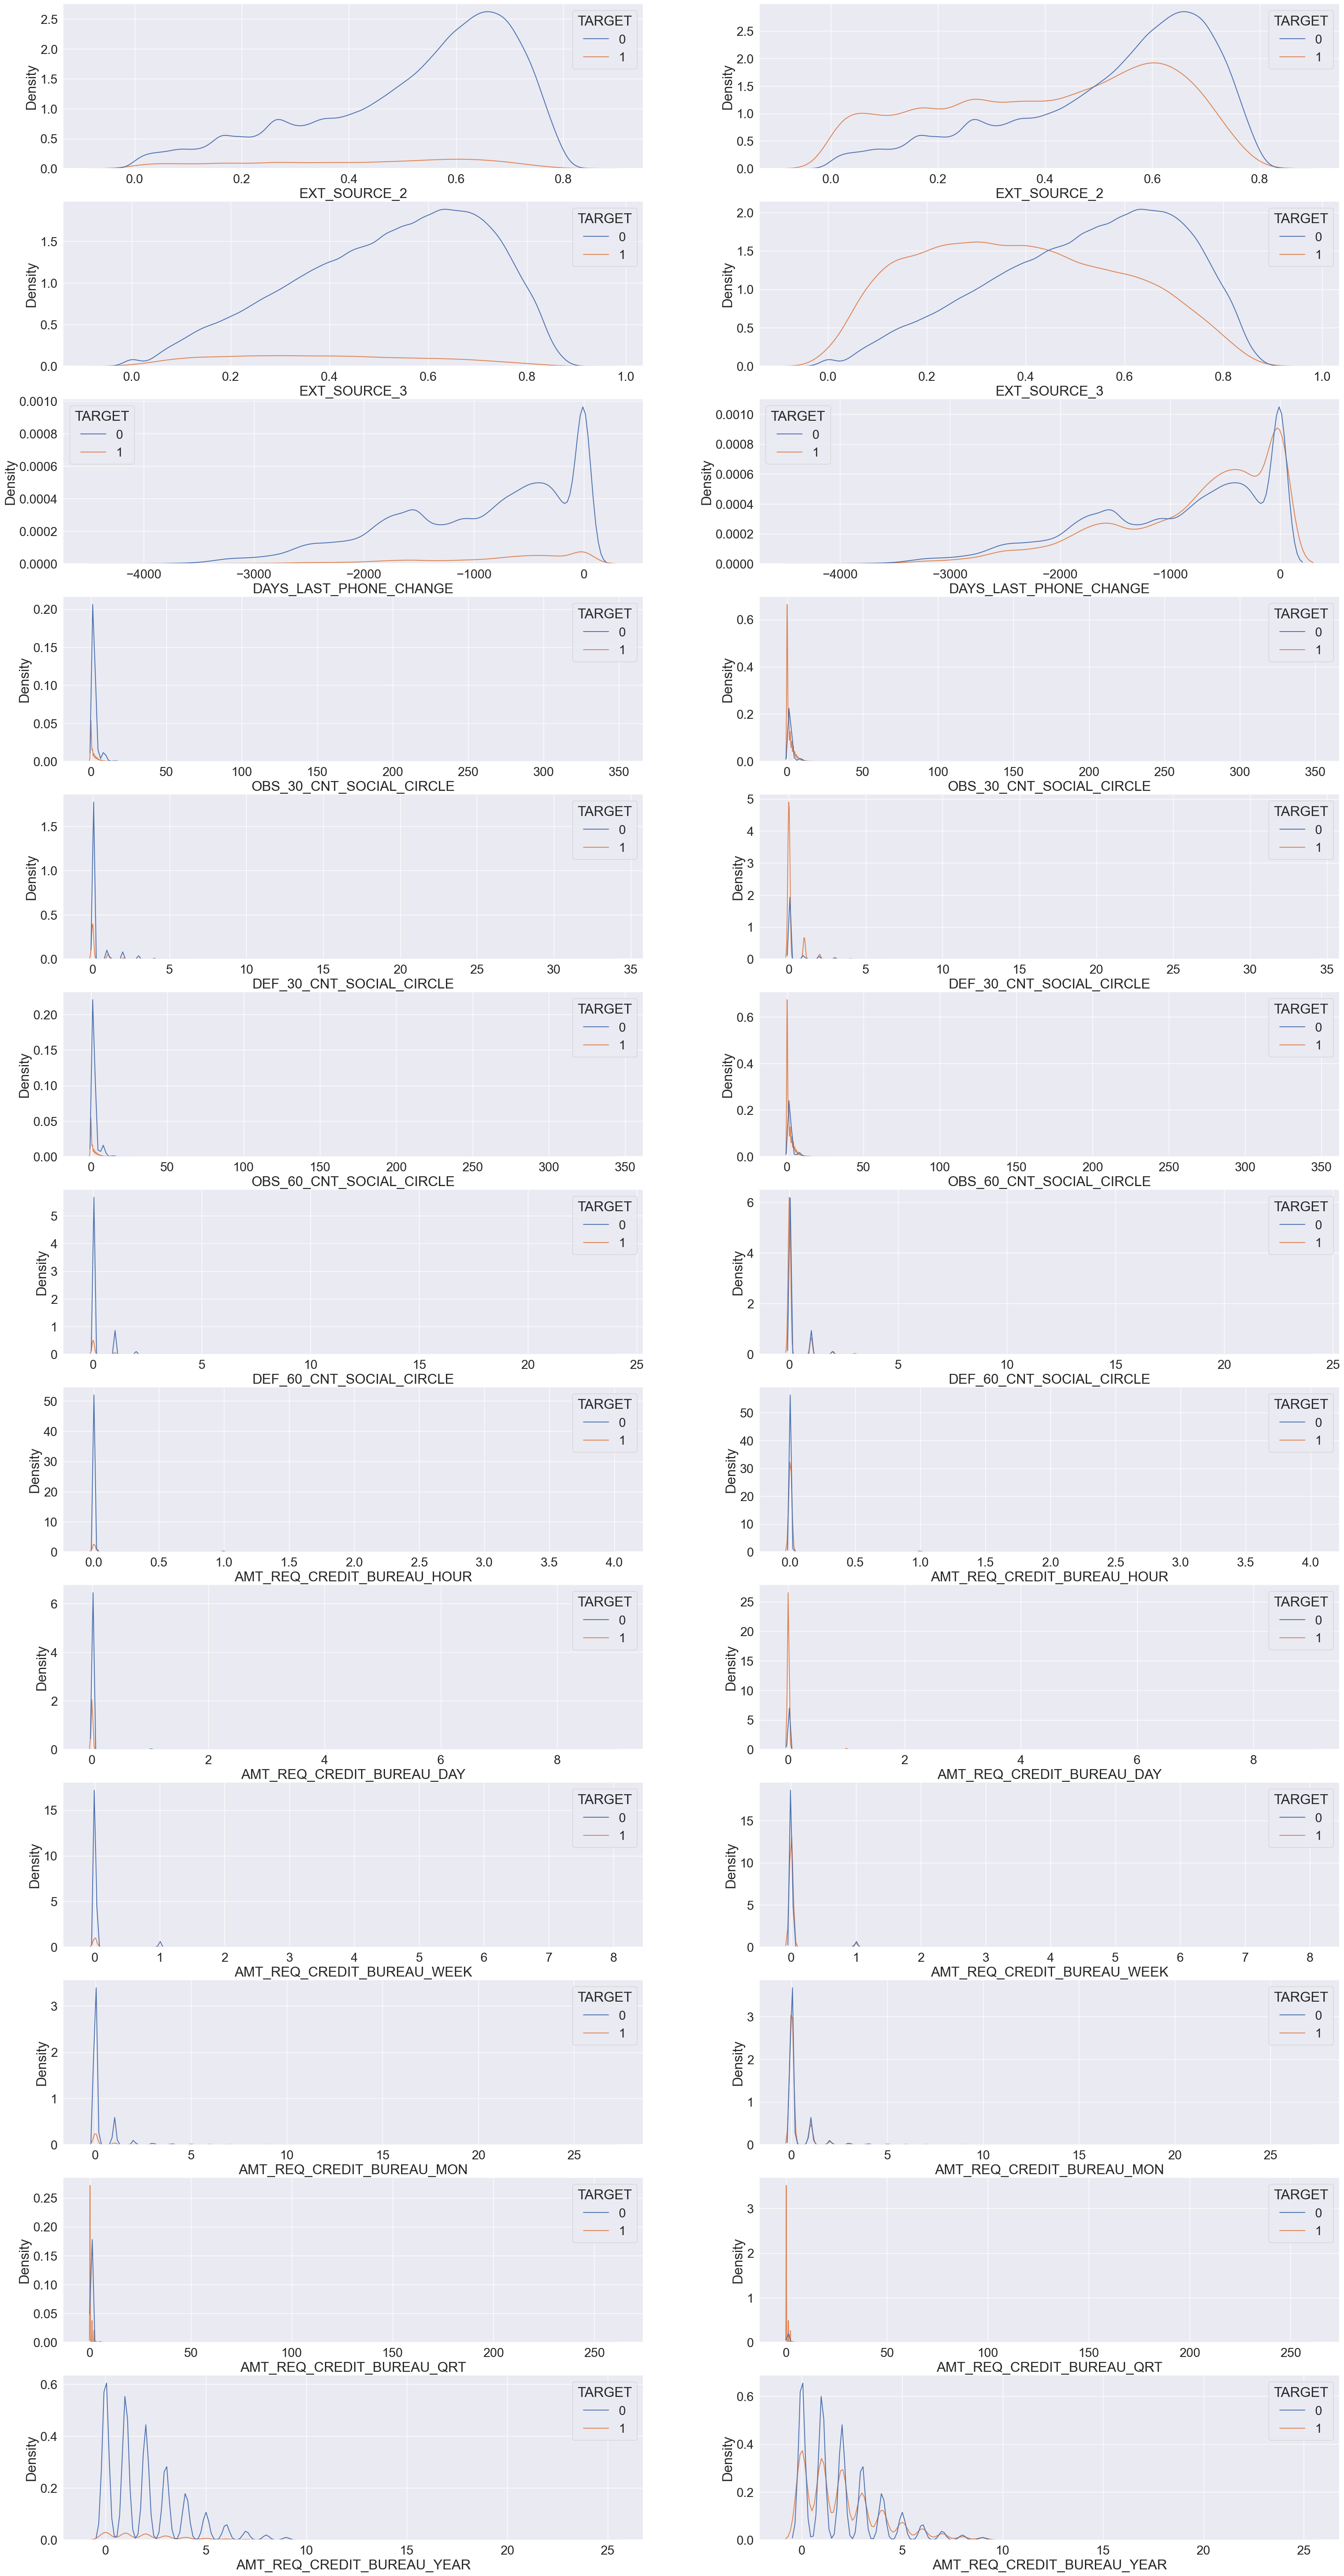

In [33]:
# might have troubles with pandas 2.x
n_height = len(num_features) # number of images vertically
n_width = 2 # number of images horizontally
figure_size = (40,80) # figure size
fig, ax = plt.subplots(n_height, n_width, figsize=figure_size)
for i in range(n_height):
    col = num_features[i]
    sns.kdeplot(data=df, x=col, hue = "TARGET", ax = ax[i,0])
    sns.kdeplot(data=df, x=col, hue = "TARGET", common_norm=False, ax = ax[i,1])
    sns.set(font_scale = 2)

Notable observations:<br>
1. EXT_SOURCE_2 and EXT_SOURCE_3 show different distributions between the normal and fraud groups.

<AxesSubplot: >

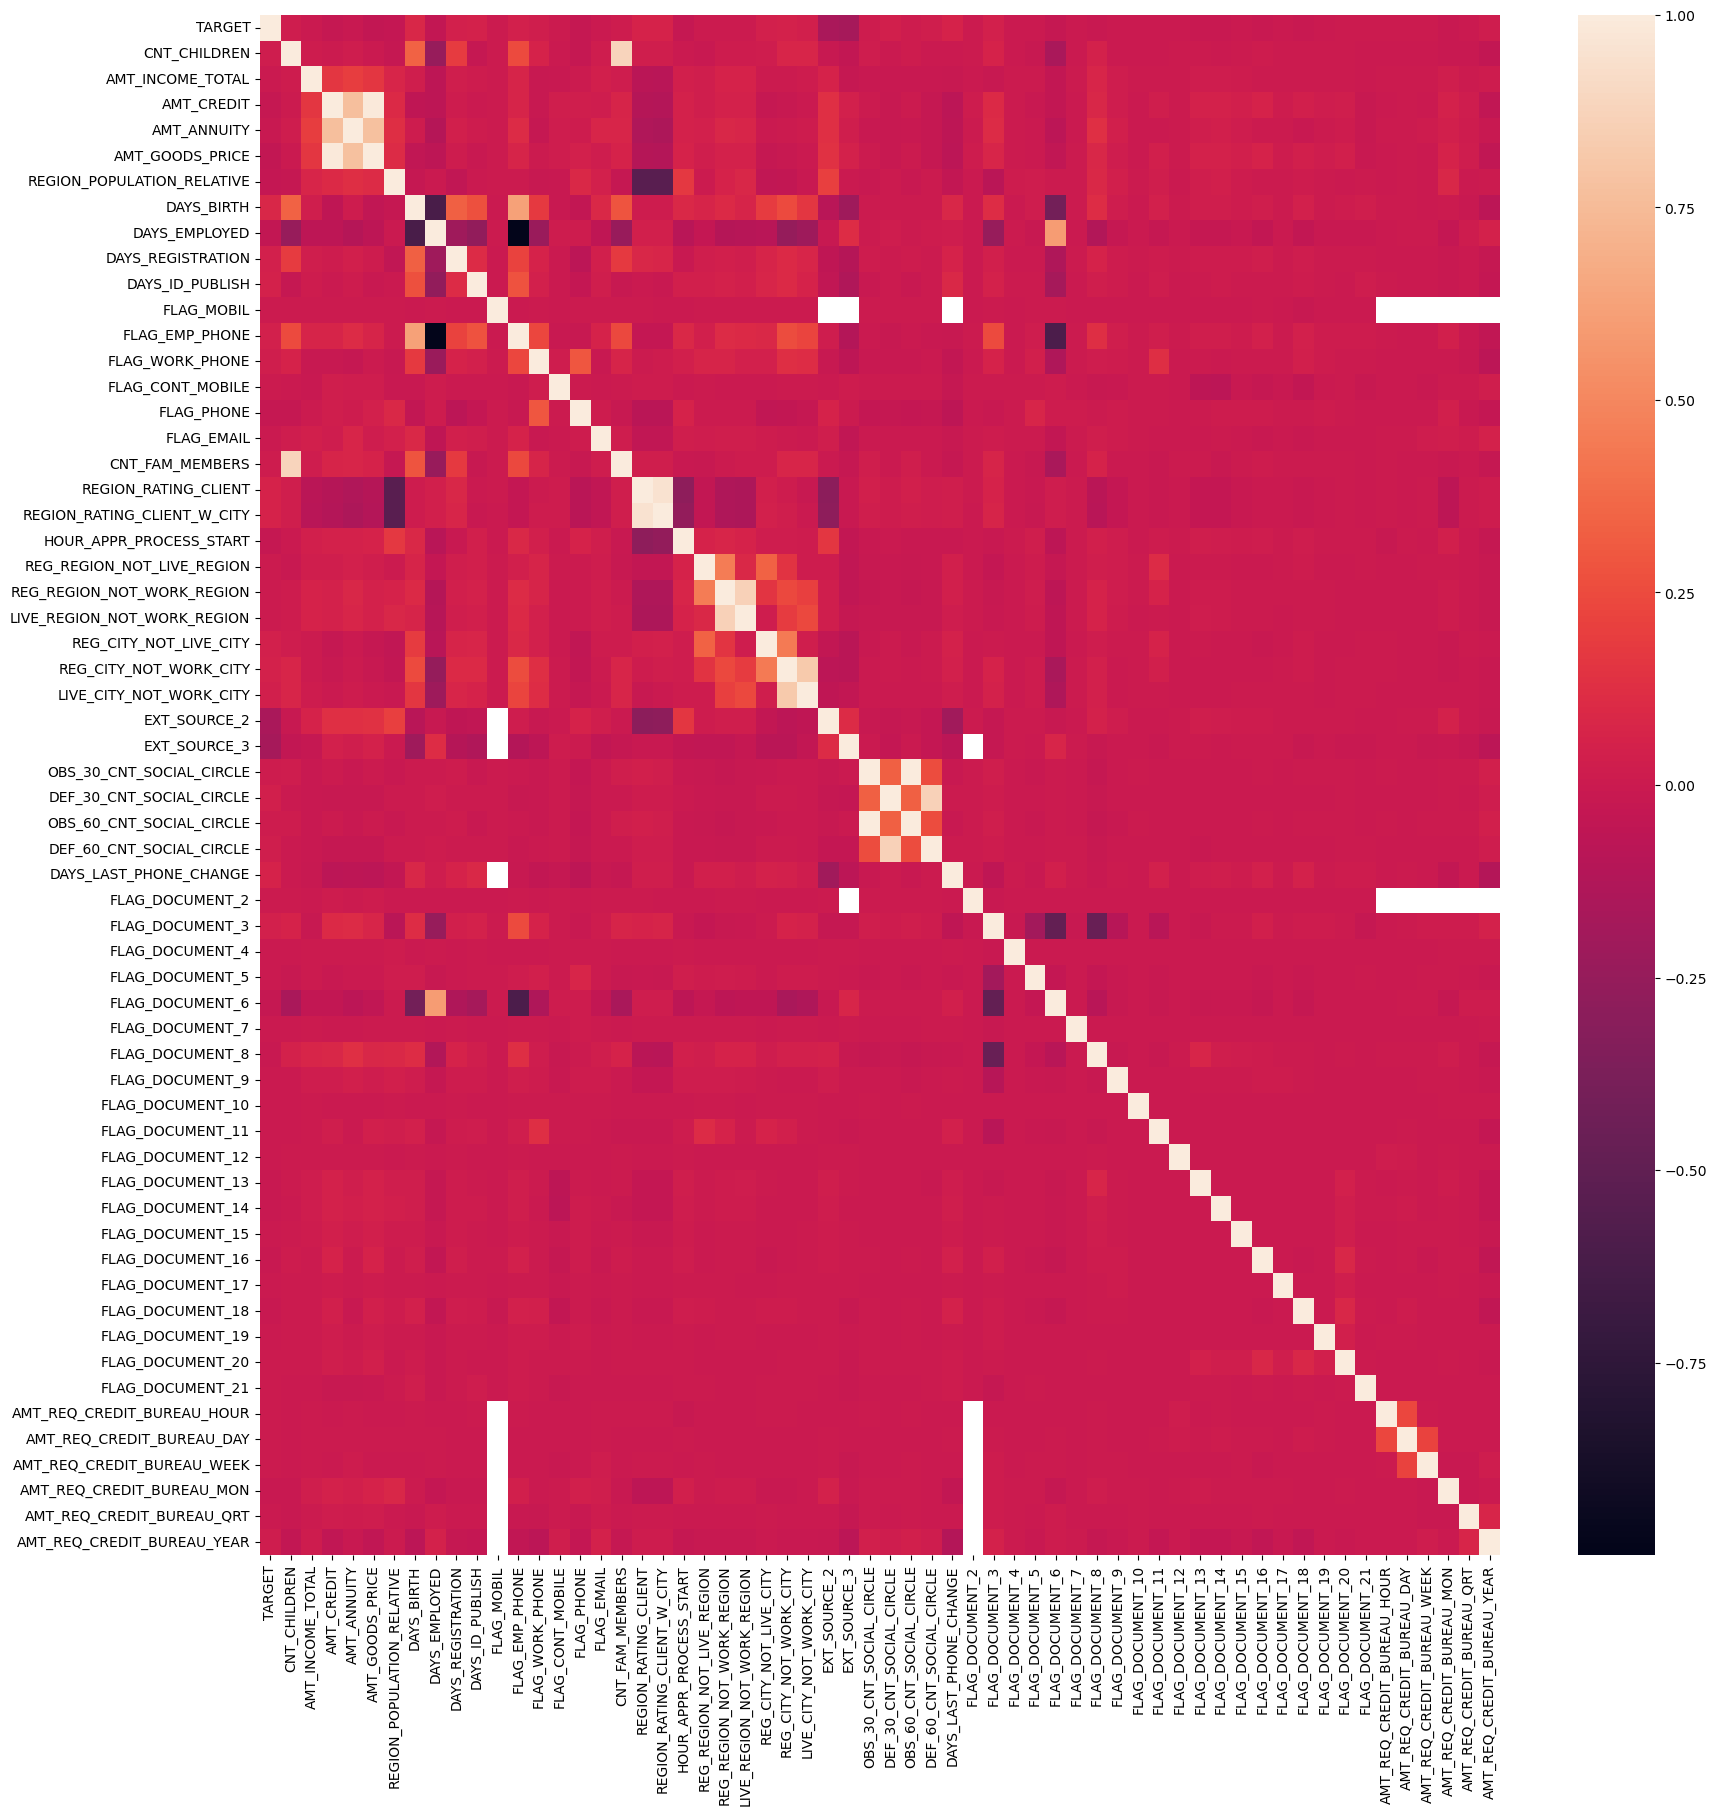

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True))

Notable observations:<br>
1. AMT_CREDIT correlates with AMT_ANNUITY and AMT_GOODS_PRICE. Use AMT_CREDIT to impute missing values in AMT_ANNUITY and AMT_GOODS_PRICE.<br>
2. CNT_CHILDREN is correlated with CNT_FAM_MEMBERS. Use CNT_CHILDREN+1 to impute missing values in CNT_FAM_MEMBERS.

### PREPROCESSING OUTSIDE OF PIPELINE

In [80]:
df['DAYS_LAST_PHONE_CHANGE']=df['DAYS_LAST_PHONE_CHANGE'].fillna(1)
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(df['CNT_CHILDREN']+1)
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna("Others")
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace({365243:0})
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna("Missing")

In [81]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TARGET[int64],Mean (sd) : 0.1 (0.3)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAIAAAAAcCAYAAACpmrfzAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABBUlEQVR4nO3bQW6DMBCF4ZkqolhCthAqx+AAHKKHzSE4APdA1bCo06rIOUAcygIlQe99S7BGXvxLj6aUJEdVnYgU2Z+3flNKceNZeiGn3EdVdU3TfHrv6y1D5nn+UtUzIziebAAiUnjv677vYwjhsjbAzMphGOppmgoRYQAHcy8AEREJIVzatv3eMMftdB96sLdnX4CeiwGAYwDgGAA4BgCOAYBjAOAYADgGAI4BgGMA4BgAOAYAjgGAYwDgGAA4BgCOAYBjAOAYADgGAG71VTC9tj2WdxjAQe21vLMagJmV/w02s3JZlpOIeFXdchfah6+q6qPruj/n3M/awRjj+ziO2eWdK5Q1QwZl4RNyAAAAAElFTkSuQmCC"">",0(0.0%)
2,NAME_CONTRACT_TYPE[object],1. Cash loans2. Revolving loans,"278,232 (90.5%)29,279 (9.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWrDMBRF0a9iQjKRMAYvxovIYrsI7cYYa9CETNRB5yGW3JfWumdu+IOLIcHP5ZwNUHBmdjGz07sPwb/xyDnfSh7shmG4eu/7vS/CMaWUFufcZ0lwnfe+n6bpFkK4/8ZxOI51Xc8xxn6e55OZbY/NzCyEcB/H8Wv363BEl9IHP/a8AniG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmc7s56O4dx+Cv6+2ky6ltMQYe6v4KA7tSCktZvYoeZbBC7YqHrw4pnxQqX2zFVeO9lRN+WpmXWhP8ZSvdtaF9tRO+fgFi5fxpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCme8jH/w1ZVU76aWRfaw+AFMt8KW2rfOfaTaQAAAABJRU5ErkJggg=="">",0(0.0%)
3,CODE_GENDER[object],1. F2. M3. XNA,"202,448 (65.8%)105,059 (34.2%)4 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3bQW6CUBSF4fMIsXUCISQsod0Di+hiuwgW0T0QwhtU64QOHBjTKT3P3v7fCq7xjwbjSdu2CXCoSh+A/yNJOko6lD4EP1y2bTuVPmJPdd/3b03TdKUPwb2c85JSeo8UXN00TTeO46lt23PpY3C1ruvzNE3dPM8HSXFik6S2bc/DMHyWPgZ3jqUP2BsPCLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDTS1d/z9V+hDcRH0/6pzzMk1Tp4D/n/rLcs6LpEvpO/bEBuFxhdsgJKZ8cIn6yRbuUyGCkOuqiMukCMKtq6IukyKIuq7iyfoB8aMubIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GATbl0V6bVEE3JdFXGZFAEbBNiwroINDwiwITbYVCml15QST3D4dZWkF0lPpQ9BfHyNwobYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoNNJelD0lfpQxAf6yrY8DUKm2/nRXM6yWPU4wAAAABJRU5ErkJggg=="">",0(0.0%)
4,FLAG_OWN_CAR[object],1. N2. Y,"202,924 (66.0%)104,587 (34.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bMWrDQBRF0a8gTNzMIARajBaRxWYRsxshNEVs3EwKF8GkNW+cl3tW8I0vAhu9obUWgMIQEeeIOPU+BL/cWmuX3kc80zjP80dKaep9CB7VWvdhGD6dghtTStO6rpec87X3Mbg7juO9lDJt23aKCJ/YIiJyztdlWb56H4MH594HPNtb7wPwfxAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CAzRtxf1ut9CH64fh9jrXUvpUxh+LLeX1Zr3SPi1vuOZ2Lw8rrsBi8DUz6ouD7Z7J4KDiynfI4zOAd2Uz7XGZwD1ykfv6xfEH/qQobYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZuymf02dxYznlc5zBOWDwAplvCltq30b8rewAAAAASUVORK5CYII="">",0(0.0%)
5,FLAG_OWN_REALTY[object],1. Y2. N,"213,312 (69.4%)94,199 (30.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQarCMBSF4Rsp8pwklEIX00W4WBeR3ZTSDFSc5A3e/Fk6OOGS/1vBBX8FS0+otRqgEMzsZmbX1ofgsE+t9dX6iDOGaZruMcax9SE4ppSyhRAeHoMbYozjsiyvlNK79TH4377vPznncV3Xq5n5i83MLKX0nuf52foYHHJrfcBZl9YHoB/EBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIDGZ/L+W1PgTfef+chlLKlnMezfFLeT0ppWxm9ml9xxkMXvxxO3gJTPmg4v2Xze23vEeup3yeZ209cjvl8z5r65H3KR//oB3hoS5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskHE75fN4c+9cT/k8z9p6xOAFMr8KW2rfQnudGwAAAABJRU5ErkJggg=="">",0(0.0%)
6,CNT_CHILDREN[int64],Mean (sd) : 0.4 (0.7)min < med < max:0.0 < 0.0 < 19.0IQR (CV) : 1.0 (0.6),15 distinct values,"<img src = ""data:image/png